# PAD - Praca domowa 5
## Jan Solarz s26342

In [553]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
PATH = "C:/Users/Jan Solarz/Downloads/Studia/trumptweets_data.csv"

In [554]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [555]:
%matplotlib inline
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

# a) usuwamy zbędne kolumny

In [567]:
df = pd.read_csv(PATH, sep=";")

In [568]:
df = df.drop(df.columns[[0, 1]], axis=1)

In [569]:
df

,WC,Analytic,Clout,Authentic,Tone,WPS,Sixltr,Dic,function,pronoun,...,Comma,Colon,SemiC,QMark,Exclam,Dash,Quote,Apostro,Parenth,OtherP
0,23,"98,23","66,81","54,89","93,61","23,00","13,04","73,91","39,13","4,35",...,"0,00","0,00","0,00","0,00","4,35","0,00","0,00","0,00","0,00","0,00"
1,22,"96,54","81,84","31,94","94,75","22,00","31,82","90,91","40,91","4,55",...,"0,00","0,00","0,00","0,00","4,55","0,00","0,00","0,00","0,00","0,00"
2,20,"96,79","50,00","15,86","96,76","20,00","15,00","50,00","15,00","0,00",...,"0,00","5,00","0,00","0,00","5,00","5,00","0,00","0,00","0,00","10,00"
3,17,"97,21","50,00","99,00","25,77","17,00","29,41","76,47","17,65","0,00",...,"0,00","11,76","0,00","0,00","0,00","0,00","0,00","0,00","0,00","11,76"
4,20,"25,89","2,31","74,76","25,77","10,00","10,00","65,00","60,00","20,00",...,"0,00","0,00","0,00","0,00","0,00","15,00","10,00","5,00","0,00","0,00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41116,19,"6,56","70,08","50,35","99,00","9,50","10,53","89,47","63,16","15,79",...,"0,00","0,00","0,00","0,00","5,26","0,00","0,00","0,00","0,00","0,00"
41117,53,"75,43","82,73","1,31","1,00","13,25","20,75","75,47","54,72","11,32",...,"7,55","0,00","0,00","0,00","1,89","0,00","0,00","0,00","0,00","0,00"
41118,47,"88,34","50,00","8,51","99,00","23,50","25,53","61,70","34,04","2,13",...,"8,51","0,00","0,00","2,13","2,13","2,13","0,00","2,13","0,00","10,64"
41119,28,"96,00","36,03","4,35","1,00","7,00","28,57","64,29","35,71","3,57",...,"3,57","0,00","0,00","3,57","3,57","3,57","14,29","0,00","0,00","10,71"


In [570]:
df.dtypes

WC            int64
Analytic     object
Clout        object
Authentic    object
Tone         object
              ...  
Dash         object
Quote        object
Apostro      object
Parenth      object
OtherP       object
Length: 93, dtype: object

In [571]:
#df['WC']=df['WC'].astype(float)
#df['Analytic'] = df['Analytic'].str.replace('[A-Za-z]', '').str.replace(',', '.').astype(float)
for i in range(1,93):
    df.iloc[:,i] = df.iloc[:,i].str.replace('[A-Za-z]', '').str.replace(',', '.').astype(float)


In [561]:

from sklearn.cluster import KMeans, DBSCAN
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import make_moons


In [572]:
l=df.sum(axis=0)
d=[]
for i in range (1,93):
    if l[i] ==0:
        d.append(i)
        
    

In [573]:
d

[85]

In [574]:
df = df.drop(df.columns[85], axis=1)
df

,WC,Analytic,Clout,Authentic,Tone,WPS,Sixltr,Dic,function,pronoun,...,Period,Comma,Colon,QMark,Exclam,Dash,Quote,Apostro,Parenth,OtherP
0,23,98.23,66.81,54.89,93.61,23.00,13.04,73.91,39.13,4.35,...,0.00,0.00,0.00,0.00,4.35,0.00,0.00,0.00,0.0,0.00
1,22,96.54,81.84,31.94,94.75,22.00,31.82,90.91,40.91,4.55,...,0.00,0.00,0.00,0.00,4.55,0.00,0.00,0.00,0.0,0.00
2,20,96.79,50.00,15.86,96.76,20.00,15.00,50.00,15.00,0.00,...,5.00,0.00,5.00,0.00,5.00,5.00,0.00,0.00,0.0,10.00
3,17,97.21,50.00,99.00,25.77,17.00,29.41,76.47,17.65,0.00,...,5.88,0.00,11.76,0.00,0.00,0.00,0.00,0.00,0.0,11.76
4,20,25.89,2.31,74.76,25.77,10.00,10.00,65.00,60.00,20.00,...,5.00,0.00,0.00,0.00,0.00,15.00,10.00,5.00,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41116,19,6.56,70.08,50.35,99.00,9.50,10.53,89.47,63.16,15.79,...,5.26,0.00,0.00,0.00,5.26,0.00,0.00,0.00,0.0,0.00
41117,53,75.43,82.73,1.31,1.00,13.25,20.75,75.47,54.72,11.32,...,5.66,7.55,0.00,0.00,1.89,0.00,0.00,0.00,0.0,0.00
41118,47,88.34,50.00,8.51,99.00,23.50,25.53,61.70,34.04,2.13,...,6.38,8.51,0.00,2.13,2.13,2.13,0.00,2.13,0.0,10.64
41119,28,96.00,36.03,4.35,1.00,7.00,28.57,64.29,35.71,3.57,...,3.57,3.57,0.00,3.57,3.57,3.57,14.29,0.00,0.0,10.71


Zmieniliśmy typ zmiennych na float, usuneliśmy nieznaczącą zmienną 'SemiC'

# b) Szukamy optymalnego k dla Kmeans

1 375862162.1
2 307075644.7
3 246706575.4
4 218237110.4
5 199556255.0
6 184460942.2
7 171702984.1
8 161605640.0
9 152682703.4
10 148026160.5
11 143593892.2
12 140215242.8
13 136839281.6
14 133720635.8
15 130728565.0
16 128610813.1
17 125897387.6
18 123669480.6
19 121303225.9


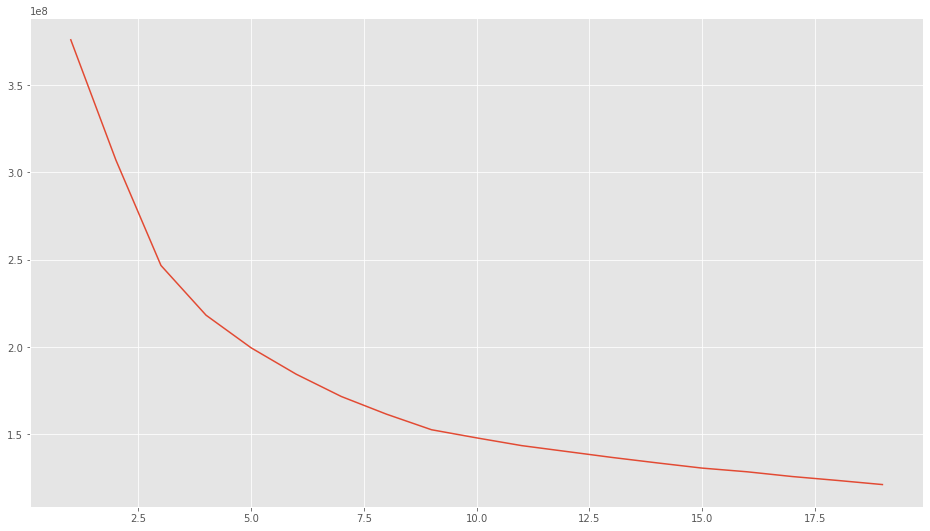

In [575]:
inertias = []
for k in range(1,20):
    km= KMeans(k).fit(df)
    inertias.append(round(km.inertia_,1))
    print(k,round(km.inertia_,1))
plt.plot(list(range(1,20)),inertias)


In [579]:
km = KMeans()
km.fit(df)
new_df = df.copy()
new_df['labels'] = km.labels_
len(np.unique(km.labels_))

8

Powyższy wykres łokciowy i domyślne utworzenie liczby etykiet/klastrów przez KMeans() wskazuje na optymalną wartość k równą 8

# c) Średnie zmiennych dla KMeans

In [580]:
t = pd.DataFrame(km.cluster_centers_,columns=df.keys())
t

,WC,Analytic,Clout,Authentic,Tone,WPS,Sixltr,Dic,function,pronoun,...,Period,Comma,Colon,QMark,Exclam,Dash,Quote,Apostro,Parenth,OtherP
0,22.202081,73.035484,51.824437,79.546239,95.774497,11.529095,22.768539,78.842957,41.327873,9.221032,...,8.199351,3.065655,1.724427,0.235877,4.449036,1.960887,3.683829,1.680368e+00,4.368678e-01,8.085294
1,21.662617,70.601067,48.534699,78.930036,17.944185,12.308217,22.496809,75.939789,42.639897,9.163686,...,8.477342,3.063407,1.575847,0.640366,3.166501,2.297708,3.533475,2.219379e+00,5.238935e-01,8.388589
2,24.718882,86.153369,73.927037,13.431772,95.642973,12.952983,23.455517,74.363129,39.595851,8.185815,...,8.436898,2.909522,1.291922,0.276885,2.998174,1.517519,3.198792,1.095089e+00,4.068840e-01,8.206078
3,1.181377,93.080308,50.139773,1.379781,26.046421,1.152227,4.168332,1.025692,0.207903,0.042737,...,0.992000,0.078275,1.302883,94.515126,1.524704,0.040486,2.556032,6.439294e-15,-1.276756e-15,99.347935
4,16.751463,88.649833,68.134850,10.450109,21.394642,12.762760,34.324232,48.151483,17.958989,3.468798,...,15.206276,1.715879,3.986127,0.578180,3.695235,5.092703,7.473091,1.793335e+00,3.208654e-01,29.166829
5,14.294714,83.906544,74.551436,7.494538,97.909826,9.495918,35.023773,53.620524,17.159814,5.526449,...,13.505510,2.090179,4.177968,0.326172,10.423855,4.001834,8.215906,1.065047e+00,1.675501e-01,32.354984
6,24.713237,60.710913,68.491069,11.659533,13.494873,13.284119,22.244660,76.140437,45.763000,11.207061,...,7.741458,3.078021,1.176202,0.785128,2.534567,1.592207,3.237613,1.964893e+00,6.560213e-01,6.538658
7,19.792341,25.646437,75.114199,15.041887,96.573084,10.295209,22.563873,78.773608,47.279941,16.945598,...,8.050479,3.120454,2.696408,0.623670,5.342026,1.798208,6.275250,2.654803e+00,3.382972e-01,11.597746


Powyższa tabela obrazuje średnie wartości każdej ze zmiennej w utworzonych 8 klastrach. Otrzymaliśmy więc 8 centroidów.

In [581]:
print("Inercja wynosi:",km.inertia_)

Inercja wynosi: 161605630.5733481


In [582]:
df_km=pd.DataFrame(t.sum(axis=1)) 
df_km.columns=['Wartości średnie każdego z klastrów']
df_km

,Wartości średnie każdego z klastrów
0,773.118445
1,675.434544
2,710.433471
3,582.323692
4,598.345544
5,724.695011
6,611.656655
7,728.216952


# Średnie dla DBscan

In [583]:
db = DBSCAN()
db.fit(df)
new_df = df.copy()
new_df['labels'] = db.labels_
new_df



,WC,Analytic,Clout,Authentic,Tone,WPS,Sixltr,Dic,function,pronoun,...,Comma,Colon,QMark,Exclam,Dash,Quote,Apostro,Parenth,OtherP,labels
0,23,98.23,66.81,54.89,93.61,23.00,13.04,73.91,39.13,4.35,...,0.00,0.00,0.00,4.35,0.00,0.00,0.00,0.0,0.00,-1
1,22,96.54,81.84,31.94,94.75,22.00,31.82,90.91,40.91,4.55,...,0.00,0.00,0.00,4.55,0.00,0.00,0.00,0.0,0.00,-1
2,20,96.79,50.00,15.86,96.76,20.00,15.00,50.00,15.00,0.00,...,0.00,5.00,0.00,5.00,5.00,0.00,0.00,0.0,10.00,-1
3,17,97.21,50.00,99.00,25.77,17.00,29.41,76.47,17.65,0.00,...,0.00,11.76,0.00,0.00,0.00,0.00,0.00,0.0,11.76,-1
4,20,25.89,2.31,74.76,25.77,10.00,10.00,65.00,60.00,20.00,...,0.00,0.00,0.00,0.00,15.00,10.00,5.00,0.0,0.00,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41116,19,6.56,70.08,50.35,99.00,9.50,10.53,89.47,63.16,15.79,...,0.00,0.00,0.00,5.26,0.00,0.00,0.00,0.0,0.00,-1
41117,53,75.43,82.73,1.31,1.00,13.25,20.75,75.47,54.72,11.32,...,7.55,0.00,0.00,1.89,0.00,0.00,0.00,0.0,0.00,-1
41118,47,88.34,50.00,8.51,99.00,23.50,25.53,61.70,34.04,2.13,...,8.51,0.00,2.13,2.13,2.13,0.00,2.13,0.0,10.64,-1
41119,28,96.00,36.03,4.35,1.00,7.00,28.57,64.29,35.71,3.57,...,3.57,0.00,3.57,3.57,3.57,14.29,0.00,0.0,10.71,-1


In [584]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import matplotlib
w = db.labels_
np.unique(w)
new_df['labels'].value_counts()

-1     38983
 0      1165
 31      258
 1        64
 32       38
       ...  
 41        5
 40        5
 4         5
 25        5
 47        5
Name: labels, Length: 64, dtype: int64

In [585]:
label = np.unique(db.labels_)
o=[]
for i in label:
    k = np.mean(new_df[new_df['labels']==i],axis=0)
    o.append(k)
df=pd.DataFrame(o)
#df=pd.DataFrame([np.mean(new_df[new_df['labels']==31],axis=0),np.mean(new_df[new_df['labels']==60],axis=0)])
df.index = np.unique(db.labels_)


In [586]:
df

,WC,Analytic,Clout,Authentic,Tone,WPS,Sixltr,Dic,function,pronoun,...,Comma,Colon,QMark,Exclam,Dash,Quote,Apostro,Parenth,OtherP,labels
-1,21.774697,69.746642,65.744999,29.45901,57.362412,12.274033,24.962549,71.034269,38.179018,9.376407,...,2.837459,2.211736,0.533242,3.933381,2.483386,4.847135,1.811635,0.450294,12.919734,-1.0
0,1.000000,93.260000,50.000000,1.00000,25.770000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,0.0
1,2.000000,93.260000,50.000000,1.00000,99.000000,2.000000,50.000000,50.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,50.000000,0.000000,0.000000,0.000000,0.000000,50.000000,1.0
2,3.000000,93.260000,50.000000,98.01000,99.000000,3.000000,66.670000,66.670000,0.000000,0.000000,...,0.000000,0.000000,0.000000,33.330000,0.000000,0.000000,0.000000,0.000000,33.330000,2.0
3,2.000000,93.260000,50.000000,1.00000,99.000000,2.000000,50.000000,50.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,50.000000,0.000000,0.000000,0.000000,0.000000,50.000000,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,3.000000,93.260000,50.000000,1.00000,99.000000,3.000000,33.330000,66.670000,0.000000,0.000000,...,0.000000,0.000000,0.000000,33.330000,0.000000,0.000000,0.000000,0.000000,0.000000,58.0
59,5.000000,93.260000,97.690000,1.00000,25.770000,5.000000,40.000000,40.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,59.0
60,9.000000,98.870000,99.000000,4.97000,99.000000,4.500000,22.220000,66.670000,33.330000,11.110000,...,0.000000,0.000000,0.000000,11.110000,0.000000,0.000000,0.000000,0.000000,11.110000,60.0
61,11.000000,93.260000,96.520000,1.00000,25.770000,11.000000,36.360000,45.450000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,45.450000,61.0


Powyższa tabela obrazuje średnie wartości każdej ze zmiennej w utworzonych 64 klastrach. 

In [587]:
df_db=pd.DataFrame(df.sum(axis=1)) 
df_db.columns=['Wartości średnie każdego z klastrów']
df_db

,Wartości średnie każdego z klastrów
-1,678.561874
0,572.030000
1,748.260000
2,781.590000
3,800.260000
...,...
58,707.230000
59,706.720000
60,819.750000
61,735.880000
